In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# All Imports

In [4]:
import os
import numpy as np
import kaggle
import keras
from keras import layers
from tensorflow import data as tf_data
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Flatten
from tensorflow.keras.datasets import fashion_mnist, mnist
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import shutil
from sklearn.model_selection import train_test_split



# All Globals

In [5]:
simple_model = True # True: We use a simple model, False: We use a heavy model.

# All Downloads


In [6]:
!kaggle competitions download -c dogs-vs-cats

 99% 803M/812M [00:06<00:00, 163MB/s]
100% 812M/812M [00:07<00:00, 121MB/s]


In [7]:
!unzip -q dogs-vs-cats.zip

In [8]:
!unzip -q test1.zip
!unzip -q train.zip

In [9]:
train_data_dir = './train'
output_dir = './'

# Get the list of all files in the training data directory
all_files = []
for root, dirs, files in os.walk(train_data_dir):
    all_files += [os.path.join(root, file) for file in files]

# Split the data into train and validation sets
train_files, val_files = train_test_split(all_files, test_size=0.2, random_state=42)

# Move the files to their respective directories
train_output_dir = os.path.join(output_dir, 'train_new')
val_output_dir = os.path.join(output_dir, 'val_new')

os.makedirs(train_output_dir, exist_ok=True)
os.makedirs(val_output_dir, exist_ok=True)

for file in train_files:
    shutil.copy(file, os.path.join(train_output_dir, os.path.relpath(file, train_data_dir)))

for file in val_files:
    shutil.copy(file, os.path.join(val_output_dir, os.path.relpath(file, train_data_dir)))

# Now you have separate train and validation directories with the split data


In [10]:
!mkdir ./train_new/cat
!mkdir ./train_new/dog
!mv ./train_new/cat* ./train_new/cat
!mv ./train_new/dog* ./train_new/dog

mv: cannot move './train_new/cat' to a subdirectory of itself, './train_new/cat/cat'
mv: cannot move './train_new/dog' to a subdirectory of itself, './train_new/dog/dog'


In [11]:
!mkdir ./val_new/cat
!mkdir ./val_new/dog
!mv ./val_new/cat* ./val_new/cat
!mv ./val_new/dog* ./val_new/dog

mv: cannot move './val_new/cat' to a subdirectory of itself, './val_new/cat/cat'
mv: cannot move './val_new/dog' to a subdirectory of itself, './val_new/dog/dog'


In [12]:
datatrain = ImageDataGenerator(rescale=1./255)
dataval = ImageDataGenerator(rescale=1./255)
datatest = ImageDataGenerator(rescale=1./255)

In [13]:
train_data = datatrain.flow_from_directory(
    './train_new',
    target_size = (200, 200),
    batch_size = 64,
    # classes = ["dog", "cat"]
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.


In [14]:
val_data = dataval.flow_from_directory(
    './val_new',
    target_size = (200, 200),
    batch_size = 64,
    # classes = ["dog", "cat"]
    class_mode='binary'
)

Found 5000 images belonging to 2 classes.


In [15]:
!mkdir ./test1/any
!mv ./test1/* ./test1/any

mv: cannot move './test1/any' to a subdirectory of itself, './test1/any/any'


In [16]:
test_data = datatrain.flow_from_directory(
    './test1',
    target_size = (200, 200),
    classes = ["any"]
)

Found 12500 images belonging to 1 classes.


In [17]:
if simple_model is True:

  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
  model.add(Conv2D(32, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.5))

  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.5))
  # taking the first row of the first slice of the volume and put it beside to the second row of the first slice, and so on
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))

else:
  model = Sequential()
  model.add(Conv2D(input_shape = (200,200,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
  model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
  model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
  model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
  model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
  model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
  model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
  model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
  model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
  model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
  model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
  model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
  model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
  model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
  model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
  model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
  model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
  model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
  model.add(Flatten())
  model.add(Dense(units = 4096,activation = "relu"))
  model.add(Dense(units = 4096,activation = "relu"))
  model.add(Dense(units = 2, activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 196, 196, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 98, 98, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 98, 98, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 94, 94, 64)        36928     
                                                        

In [18]:
model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = 'sgd')

In [19]:
hist = model.fit(train_data, validation_data= val_data, epochs = 10)

Epoch 1/10
313/313 [==============================] - 95s 268ms/step - loss: 0.6895 - accuracy: 0.5426 - val_loss: 0.6845 - val_accuracy: 0.6070
Epoch 2/10
313/313 [==============================] - 83s 264ms/step - loss: 0.6709 - accuracy: 0.5901 - val_loss: 0.6777 - val_accuracy: 0.5526
Epoch 3/10
313/313 [==============================] - 84s 266ms/step - loss: 0.6549 - accuracy: 0.6095 - val_loss: 0.6693 - val_accuracy: 0.5784
Epoch 4/10
313/313 [==============================] - 84s 268ms/step - loss: 0.6412 - accuracy: 0.6240 - val_loss: 0.6337 - val_accuracy: 0.6324
Epoch 5/10
313/313 [==============================] - 88s 281ms/step - loss: 0.6289 - accuracy: 0.6382 - val_loss: 0.6399 - val_accuracy: 0.6174
Epoch 6/10
313/313 [==============================] - 85s 271ms/step - loss: 0.6146 - accuracy: 0.6535 - val_loss: 0.6175 - val_accuracy: 0.6448
Epoch 7/10
313/313 [==============================] - 84s 267ms/step - loss: 0.6018 - accuracy: 0.6660 - val_loss: 0.6248 - val_ac

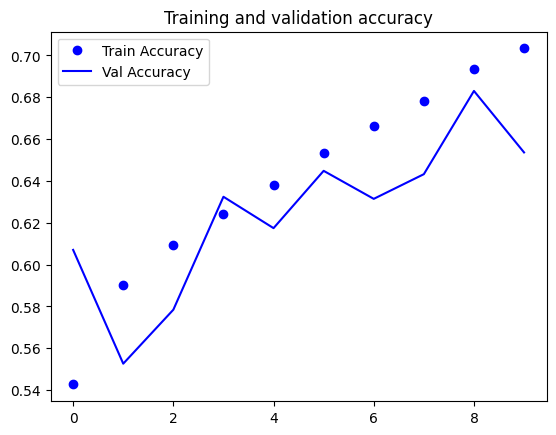

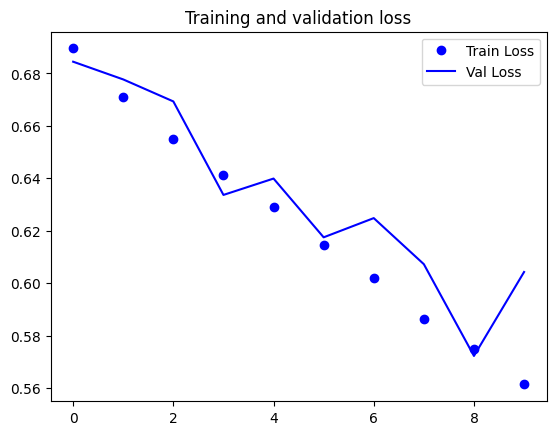

In [20]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Train Accuracy')
plt.plot(epochs, val_acc, 'b', label='Val Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig("accuracies.jpg")
plt.figure()

plt.plot(epochs, loss, 'bo', label='Train Loss')
plt.plot(epochs, val_loss, 'b', label='Val Loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig("losses.jpg")
plt.show()